<a href="https://colab.research.google.com/github/bishalnstu/Target-Classification-from-imbalance-dataset/blob/master/Predict_Class_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn

In [150]:
#data_path = '/content/drive/MyDrive/Colab Notebooks/...../data.csv'
data_path='data.csv''

In [157]:
data=pd.read_csv(data_path, header= None)
data.shape

(8000, 16)

In [158]:
data.columns =['A', 'B', 'C', 'D','E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'Target'] 

In [162]:
X_temp=data.drop(data.columns[15], axis=1)
X_temp.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.031099,47.043496,56.012174,9.677363,0.684160,8.506053,15.611292,-0.000549,1.715164,5.924566,20.422503,19.081833,3.209000,1.870875,3.896625
std,1.504326,8.498571,4.166679,0.589888,0.480732,2.218916,2.203081,1.237881,1.618038,2.765070,2.392490,1.992950,1.892291,0.920493,2.390743
min,2.000500,25.005000,40.007000,9.000100,0.000163,5.000200,12.001000,-6.573400,-1.234700,-2.614200,7.732800,13.084000,1.000000,1.000000,1.000000
25%,2.916775,41.833750,55.598000,9.279175,0.315230,6.675400,13.716250,-0.756698,0.743958,4.018175,18.855750,19.307750,2.000000,1.000000,2.000000
50%,3.834800,47.855000,57.059000,9.566550,0.611265,8.355900,15.489000,-0.006327,1.133550,5.557850,20.777500,19.852500,3.000000,2.000000,4.000000
75%,4.652550,53.895250,58.521250,9.849725,0.919390,9.987375,17.260500,0.748653,1.665325,7.495850,22.078000,20.247000,4.000000,2.000000,5.000000
max,8.999700,60.000000,59.999000,12.000000,1.999900,13.991000,19.999000,5.897300,6.512000,16.319000,29.233000,22.167000,8.000000,4.000000,10.000000


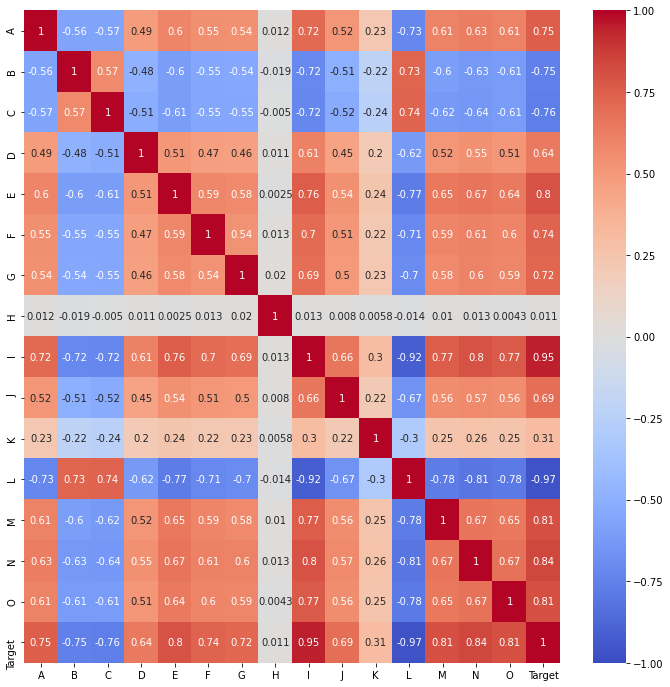

In [37]:
plt.figure(figsize=(12,12))
seaborn.heatmap(data.corr(),annot=True,cmap='coolwarm',vmin=-1)

In [38]:
correlation=data.corr().abs()
cm = seaborn.light_palette("green", as_cmap=True)
columns=correlation.nlargest(5, 'Target').index.tolist()
correlation.nlargest(5, 'Target')[columns].style.background_gradient(cmap=cm)

,Target,L,I,N,O
Target,1.000000,0.968256,0.951439,0.839655,0.806041
L,0.968256,1.000000,0.920283,0.812197,0.783070
I,0.951439,0.920283,1.000000,0.798808,0.766724
N,0.839655,0.812197,0.798808,1.000000,0.674041
O,0.806041,0.783070,0.766724,0.674041,1.000000


In [114]:
X=data[columns].drop('Target', axis=1)
Y=data['Target']
X.shape,Y.shape

((8000, 4), (8000,))

In [144]:
X.describe()

,L,I,N,O
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,19.081833,1.715164,1.870875,3.896625
std,1.992950,1.618038,0.920493,2.390743
min,13.084000,-1.234700,1.000000,1.000000
25%,19.307750,0.743958,1.000000,2.000000
50%,19.852500,1.133550,2.000000,4.000000
75%,20.247000,1.665325,2.000000,5.000000
max,22.167000,6.512000,4.000000,10.000000


Checking the balanceness of the dataset. And It shows dataset is imbalanced the ratio between two class is : 7.5:2.5

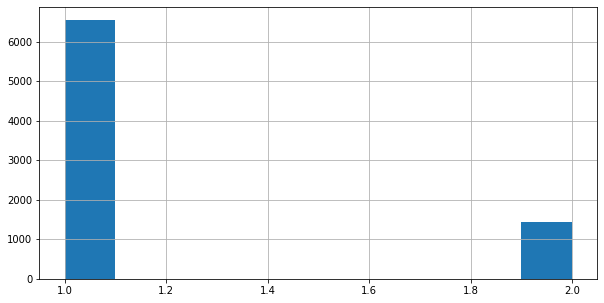

In [40]:
Y.hist(bins=10, figsize=(10,5))
plt.show()

In [63]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [120]:
os =  RandomOverSampler(ratio=1.0)
X_res, Y_res = os.fit_sample(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The below histogram shows that our new Oversampled dataset is balanced

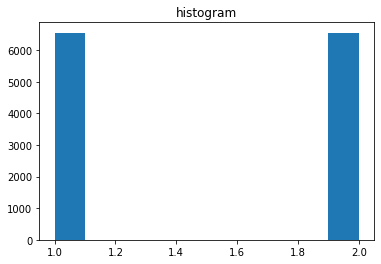

In [126]:
plt.hist(Y_res, bins =10) 
plt.title("histogram") 
plt.show()

In [127]:
X_res.shape,Y_res.shape

((13106, 4), (13106,))

In [128]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({1: 6553, 2: 1447})
Resampled dataset shape Counter({1: 6553, 2: 6553})


In [129]:
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res, test_size=0.25, random_state=2698)
accuracy_list = []

In [130]:
print('Resampled dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_test)))

Resampled dataset shape Counter({1: 4943, 2: 4886})
Resampled dataset shape Counter({2: 1667, 1: 1610})


In [131]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [132]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(log_reg_acc*100)

100.0


In [133]:
from mlxtend.plotting import plot_confusion_matrix

<Figure size 432x288 with 0 Axes>

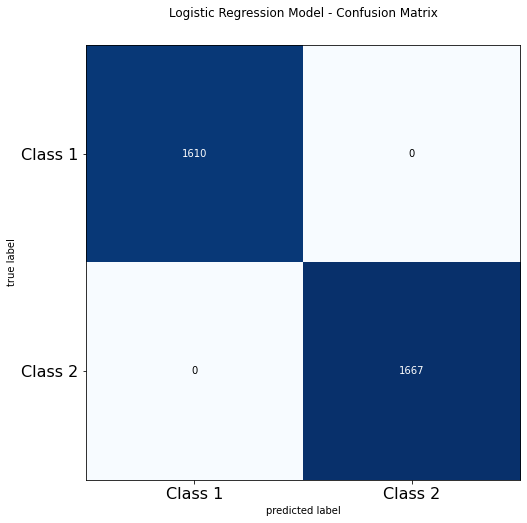

In [134]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

In [135]:
r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
print(r_acc*100)

100.0


<Figure size 432x288 with 0 Axes>

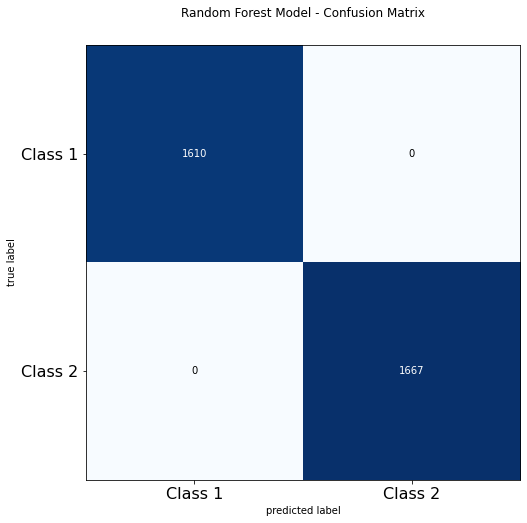

In [136]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

In [137]:
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
print(sv_clf_acc*100)

100.0


<Figure size 432x288 with 0 Axes>

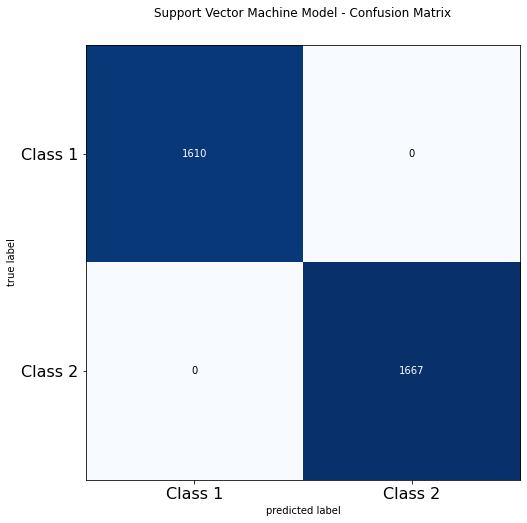

In [138]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Support Vector Machine Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(dt_acc*100)

100.0


<Figure size 432x288 with 0 Axes>

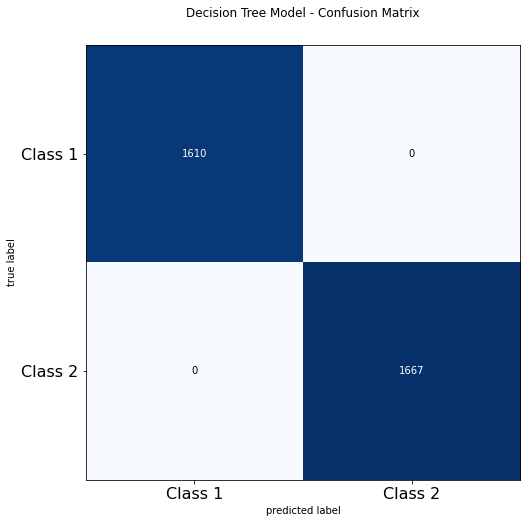

In [141]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()